<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Decision_space_and_objective_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relation between decision space and objective *space*

1. **Objective Function**: We define a simple objective function, $f(x_1, x_2) = x_1^2 + x_2^2 $, which is being used as our objective.
2. **Decision Variables Grid**: We create a grid of decision variable values (`x1` and `x2`) using `numpy.linspace` and `numpy.meshgrid`.
3. **Objective Values Calculation**: We compute the objective value for every combination of decision variables in the grid.
4. **3D Plotting**: Using `matplotlib`, we create a 3D surface plot where the x and y axes represent the decision variables and the z axis represents the objective value.

This gives a visual representation of how the decision variables relate to the objective value in a 3D plot.

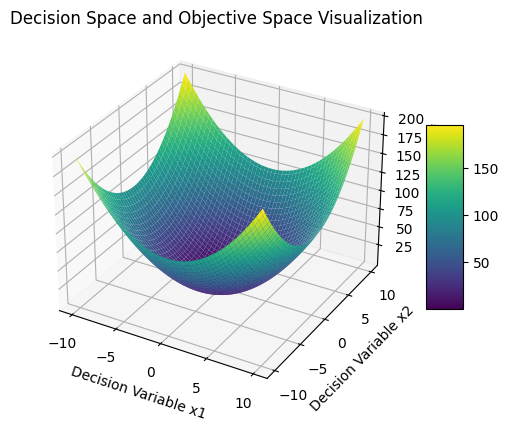

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the objective function. For instance, let's use a simple quadratic function.
def objective_function(x1, x2):
    return x1**2 + x2**2

# Create a grid of decision variable values.
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the objective function value over the grid.
Z = objective_function(X1, X2)

# Set up the figure and add a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Decision Space and Objective Space Visualization')
ax.set_xlabel('Decision Variable x1')
ax.set_ylabel('Decision Variable x2')
ax.set_zlabel('Objective Value f')

# Show the plot
plt.show()

Let's enhance this example by including some constraints. Constraints in optimization problems limit the feasible region of decision variables. We'll add two simple linear constraints to our optimization problem:

1. $ x_1 + x_2 \leq 15 $
2. $ x_1 - x_2 \geq 1 $

Here's the updated example in Python:

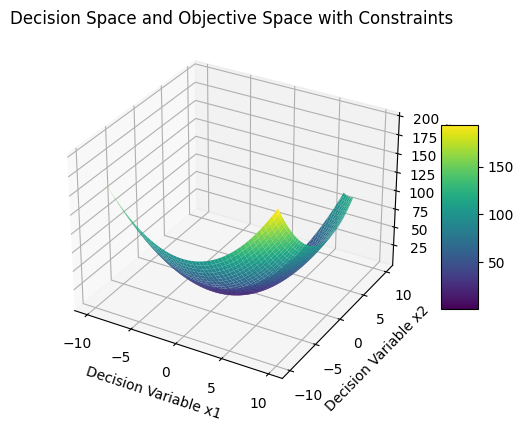

In [4]:
# Define the objective function.
def objective_function(x1, x2):
    return x1**2 + x2**2

# Constraint functions
def constraint1(x1, x2):
    return x1 + x2 - 15  # Should be <= 0

def constraint2(x1, x2):
    return x1 - x2 - 1  # Should be >= 0

# Create a grid of decision variable values.
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the objective function value over the grid.
Z = objective_function(X1, X2)

# Apply constraints and mask values that do not satisfy the constraints.
mask = (constraint1(X1, X2) <= 0) & (constraint2(X1, X2) >= 0)
Z_with_constraints = np.where(mask, Z, np.nan)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z_with_constraints, cmap='viridis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Decision Space and Objective Space with Constraints')
ax.set_xlabel('Decision Variable x1')
ax.set_ylabel('Decision Variable x2')
ax.set_zlabel('Objective Value f')

# Show the plot
plt.show()

Let's visualize  the global optimum (minimum) of an objective function without constraints

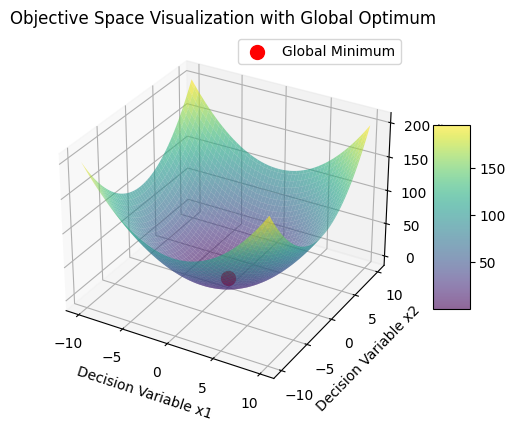

In [5]:

# Define the objective function.
def objective_function(x1, x2):
    return x1**2 + x2**2

# Create a grid of decision variable values.
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the objective function value over the grid.
Z = objective_function(X1, X2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)

# Highlight the global minimum point
global_min_x1 = 0
global_min_x2 = 0
global_min_f = objective_function(global_min_x1, global_min_x2)

# Plot the global minimum point
ax.scatter(global_min_x1, global_min_x2, global_min_f, color='red', s=100, label='Global Minimum')

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Objective Space Visualization with Global Optimum')
ax.set_xlabel('Decision Variable x1')
ax.set_ylabel('Decision Variable x2')
ax.set_zlabel('Objective Value f')
ax.legend()

# Show the plot
plt.show()

Let's visuale the path taken by a gradient descent algorithm from a random starting point to the global minimum. Here's how you can do it for the objective function $ f(x_1, x_2) = x_1^2 + x_2^2 $.

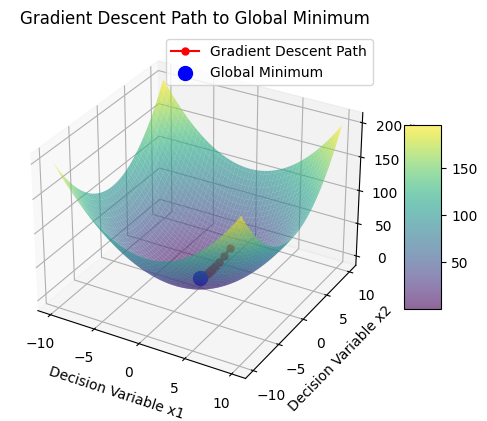

In [7]:
# Define the objective function and its gradient.
def objective_function(x1, x2):
    return x1**2 + x2**2

def gradient(x1, x2):
    grad_x1 = 2 * x1
    grad_x2 = 2 * x2
    return np.array([grad_x1, grad_x2])

# Gradient descent parameters
learning_rate = 0.1
max_iters = 100
tol = 1e-6

# Start from a random point
np.random.seed(0)
start_x1 = np.random.uniform(-10, 10)
start_x2 = np.random.uniform(-10, 10)
current_point = np.array([start_x1, start_x2])

# List to store the path taken by gradient descent
path = [current_point.copy()]

for i in range(max_iters):
    grad = gradient(current_point[0], current_point[1])
    next_point = current_point - learning_rate * grad

    path.append(next_point.copy())
    if np.linalg.norm(next_point - current_point) < tol:
        break
    current_point = next_point

# Convert path to arrays for plotting
path = np.array(path)
x_path = path[:, 0]
y_path = path[:, 1]
z_path = objective_function(x_path, y_path)

# Create a grid of decision variable values.
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the objective function value over the grid.
Z = objective_function(X1, X2)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)

# Plot the path taken by gradient descent
ax.plot(x_path, y_path, z_path, color='red', marker='o', markersize=5, label='Gradient Descent Path')

# Highlight the global minimum point
global_min_x1 = 0
global_min_x2 = 0
global_min_f = objective_function(global_min_x1, global_min_x2)
ax.scatter(global_min_x1, global_min_x2, global_min_f, color='blue', s=100, label='Global Minimum')

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_title('Gradient Descent Path to Global Minimum')
ax.set_xlabel('Decision Variable x1')
ax.set_ylabel('Decision Variable x2')
ax.set_zlabel('Objective Value f')
ax.legend()

# Show the plot
plt.show()

Let's visualize a non-convex objective function, we'll use a more complex function that has multiple local minima and a global minimum. A common example of such a function is the Himmelblau's function, defined as:

$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $

We'll visualize the surface of this function and show the path taken by gradient descent from a random starting point.

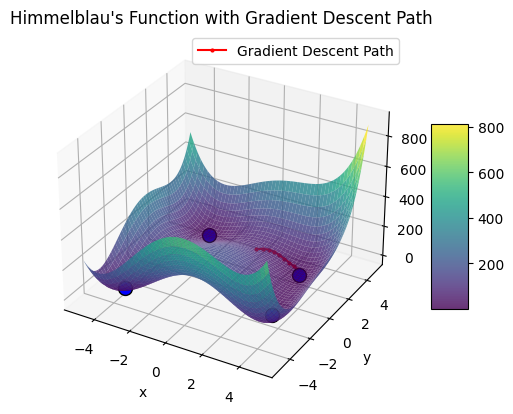

In [8]:

# Define the Himmelblau's function and its gradient.
def himmelblau_function(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradient(x, y):
    grad_x = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    grad_y = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([grad_x, grad_y])

# Gradient descent parameters
learning_rate = 0.01
max_iters = 2000
tol = 1e-6

# Start from a random point within a specified range
np.random.seed(0)
start_x = np.random.uniform(-5, 5)
start_y = np.random.uniform(-5, 5)
current_point = np.array([start_x, start_y])

# List to store the path taken by gradient descent
path = [current_point.copy()]

for i in range(max_iters):
    grad = gradient(current_point[0], current_point[1])
    next_point = current_point - learning_rate * grad

    path.append(next_point.copy())
    if np.linalg.norm(next_point - current_point) < tol:
        break
    current_point = next_point

# Convert path to arrays for plotting
path = np.array(path)
x_path = path[:, 0]
y_path = path[:, 1]
z_path = himmelblau_function(x_path, y_path)

# Create a grid of decision variable values.
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Calculate the Himmelblau's function value over the grid.
Z = himmelblau_function(X, Y)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the path taken by gradient descent
ax.plot(x_path, y_path, z_path, color='red', marker='o', markersize=2, label='Gradient Descent Path')

# Highlighting the global minimum locations found through literature
min_points = [(3, 2), (-2.805118, 3.131312), (-3.779310, -3.283186), (3.584428, -1.848126)]
for (min_x, min_y) in min_points:
    min_z = himmelblau_function(min_x, min_y)
    ax.scatter(min_x, min_y, min_z, color='blue', s=100, edgecolor='k')

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Labels and title
ax.set_title("Himmelblau's Function with Gradient Descent Path")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()

# Show the plot
plt.show()